In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import statsmodels.api as sm

from scipy.special import gamma, digamma, gammaln

In [2]:
num_runs = 4

base_path = "analyses/simulation_studies/"

# alpha
file_path_alpha = base_path + "output/alpha_store_"
alpha_list = []
for i in range(num_runs):
    file_path = file_path_alpha + f"{i}.pkl"
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
    f.close()
    alpha_list.append(data)

# beta
file_path_beta = base_path + "output/beta_store_"
beta_list = []
for i in range(num_runs):
    file_path = file_path_beta + f"{i}.pkl"
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
    f.close()
    beta_list.append(data)

# eta
file_path_eta = base_path + "output/eta_store_"
eta_list = []
for i in range(num_runs):
    file_path = file_path_eta + f"{i}.pkl"
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
    f.close()
    eta_list.append(data)

# zeta
file_path_zeta = base_path + "output/zeta_store_"
zeta_list = []
for i in range(num_runs):
    file_path = file_path_zeta + f"{i}.pkl"
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
    f.close()
    zeta_list.append(data)

# n
file_path_n = base_path + "output/n_store_"
n_list = []
for i in range(num_runs):
    file_path = file_path_n + f"{i}.pkl"
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
    f.close()
    n_list.append(data)

# tau
file_path_tau = base_path + "output/tau_store_"
tau_list = []
for i in range(num_runs):
    file_path = file_path_tau + f"{i}.pkl"
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
    f.close()
    tau_list.append(data)

## sigma
# file_path_sigma = base_path + "output/sigma_store_"
# sigma_list = []
# for i in range(num_runs):
#     file_path = file_path_sigma + f"{i}.pkl"
#     with open(file_path, 'rb') as f:
#         data = pickle.load(f)
#     f.close()
#     sigma_list.append(data)

# KL
file_path_KL = base_path + "output/KL_div_"
KL_list = []
for i in range(num_runs):
    file_path = file_path_KL + f"{i}.pkl"
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
    f.close()
    KL_list.append(data)

In [32]:
# True parameters
lam_matrix = np.array([[5, 3],
                       [2, 8]])
rho_matrix = np.array([[0.6, 0.1],
                       [0.2, 0.7]])
# change_time = 30
# change_node = 0

Plot the rates

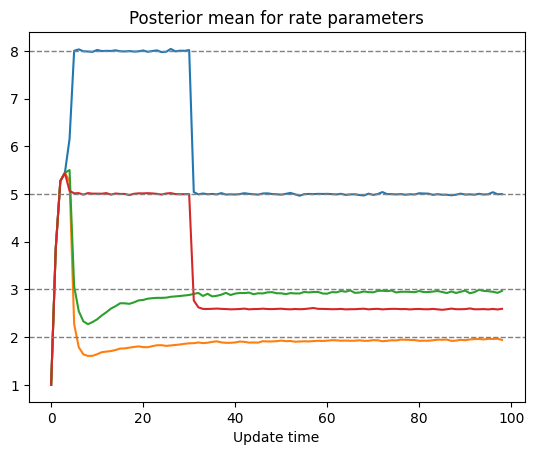

In [36]:
T_max = 100; int_length = 1

# Plot the mean of the posteriors for lambda with iteration number
for index in [3]:
        alpha = alpha_list[index]; beta = beta_list[index]
        for j in [0,1]:
                for k in [0,1]:
                        plt.plot(np.arange(int(T_max/int_length) - 1),
                                [alpha[i,j,k] / beta[i,j,k] for i in np.arange(T_max - 1)])
                        #  plt.plot(np.arange(35, 50),
                                # [alpha[i,j,k] / beta[i,j,k] for i in np.arange(35, 50)])

for i in range(2):
        for j in range(2):
                plt.axhline(lam_matrix[i,j], linestyle='--', linewidth=1, color='gray')

# plt.axvline(30, linestyle='--', linewidth=1, color='r')
# plt.axvline(60, linestyle='--', linewidth=1, color='r')
# plt.axvline(90, linestyle='--', linewidth=1, color='r')

# plt.axvline(40, linestyle='--', linewidth=1, color='r')
# plt.axvline(41, linestyle='--', linewidth=1, color='r')
# plt.axvline(42, linestyle='--', linewidth=1, color='r')
# plt.axvline(43, linestyle='--', linewidth=1, color='r')
# plt.axvline(44, linestyle='--', linewidth=1, color='r')
# plt.axvline(45, linestyle='--', linewidth=1, color='r')
                
plt.xlabel("Update time")
# plt.ylabel(r"Posterior means");
plt.title("Posterior mean for rate parameters");

In [12]:
def moving_average(data, window_size):
    # Define a kernel for the moving average
    kernel = np.ones(window_size) / window_size

    # Use numpy's convolution function to calculate the moving average
    result = np.convolve(data, kernel, mode='valid')

    return result

# Example usage
data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
window_size = 3

result = moving_average(data, window_size)
print(result)

[2. 3. 4. 5. 6. 7. 8.]


Plot the KL

In [42]:
def kl(a1, a2, b1, b2):
    """
    Parameters:
        - a1, b1: the rate and scale of the approx posterior from t-1.
        - a2, b2: the rate and scale of the approx posterior from t.
    """
    return (
            a2 * np.log(b1 / b2) - gammaln(a1) + gammaln(a2) +
            (a1 - a2) * digamma(a1) - (b1 - b2) * a1 / b1)

T_max = 100; int_length = 1
burn_in = 10

legend_labels = []
for lag in [1]:
        # Plot the mean of the posteriors for lambda with iteration number
        for index in [3]:
                alpha = alpha_list[index]; beta = beta_list[index]
                for j in [0]:
                        for k in [0]:
                                kl_vals = np.array([abs(kl(alpha[i-lag,j,k], alpha[i,j,k],
                                                        beta[i-lag,j,k], beta[i,j,k]))
                                                        for i in np.arange(burn_in,T_max - 1)])
                                # kl_vals = np.array([abs(kl(alpha[i-lag,j,k], alpha[i,j,k],
                                #                         beta[i-lag,j,k], beta[i,j,k]))
                                #                         for i in np.arange(T_max - 1)])
                                # window_size = 5
                                # kl_moving_average = moving_average(kl_vals, window_size)

                                # plt.plot(np.arange(burn_in + 4, int(T_max/int_length) - 1),
                                #         kl_moving_average,
                                #         marker='o')
                                # legend_labels.append(f'Lag {lag}')
                                # plt.plot(np.arange(burn_in + 4, int(T_max/int_length) - 1),
                                #         kl_vals[4:],
                                #         marker='o')
                                # legend_labels.append(f'Lag {lag}')

                                # plt.plot(np.arange(35, 50),
                                #         kl_vals[35:50],
                                #         marker='o')
                                # legend_labels.append(f'Lag {lag}')
                                
                                # plt.fill_between(np.arange(burn_in + 1, int(T_max/int_length) - 1),
                                #                  lower_bound, upper_bound, alpha=0.1)
                                
# plt.legend(legend_labels, title='Lag')
# plt.xlabel("Update time")
# plt.title("KL divergence from current iteration to previous");
kl_vals

array([2.86105748e+00, 9.90663791e-01, 4.48456972e-02, 1.71428475e-02,
       3.56812288e-01, 6.91039164e-01, 2.48695482e-02, 1.15706017e-01,
       2.00501540e-01, 4.38052128e-02, 5.72430044e-01, 1.40945100e+00,
       5.13891450e-01, 3.04906846e-01, 2.25729932e+00, 6.39735237e-02,
       6.31338543e+00, 4.58951447e+00, 3.66460339e-01, 1.45888021e-02,
       4.12345901e-01, 1.76144366e+04, 6.10973248e+00, 9.24318714e-01,
       6.15603420e-01, 9.35750099e-02, 2.42923460e-01, 1.92309742e+00,
       2.49123908e+00, 7.56676534e-02, 4.57520122e-02, 2.03600221e-01,
       9.83941047e-01, 5.46365183e-01, 1.81289905e-01, 1.57386872e-01,
       1.49272333e+00, 3.21942055e-02, 5.37682893e-01, 8.52078657e-02,
       1.83518943e-01, 7.70999937e-01, 1.14075239e+00, 2.43071299e+00,
       2.40497171e+00, 2.91261332e+00, 5.43326185e-02, 2.65472459e-02,
       6.23183409e-02, 7.80408659e-03, 7.06519120e-03, 5.65016855e-02,
       1.23811761e-01, 4.55943444e-01, 1.36997894e+00, 2.56483492e-01,
      

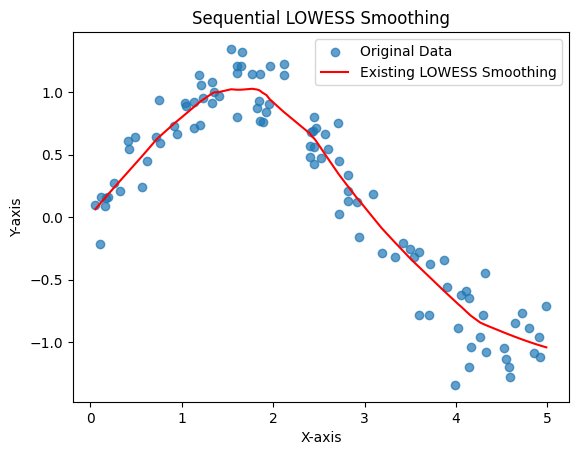

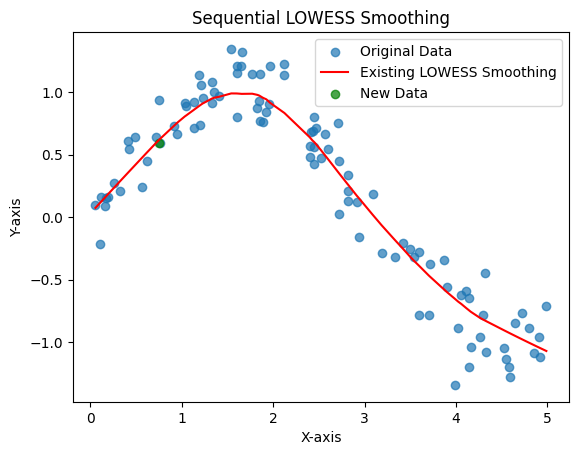

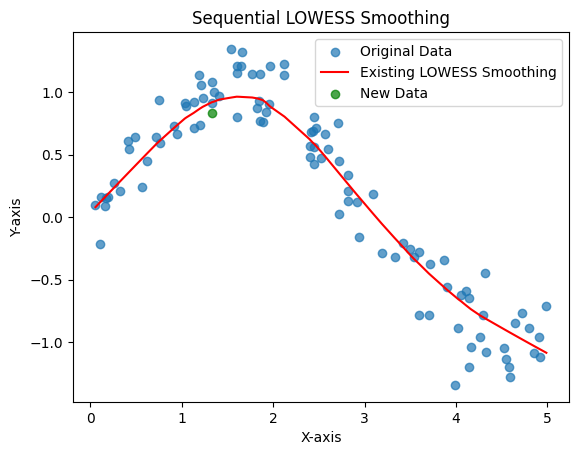

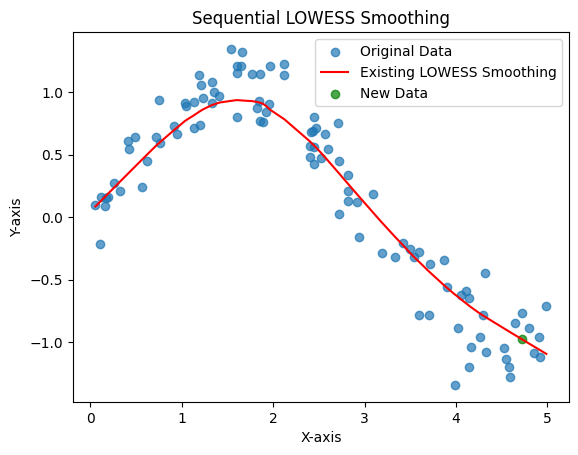

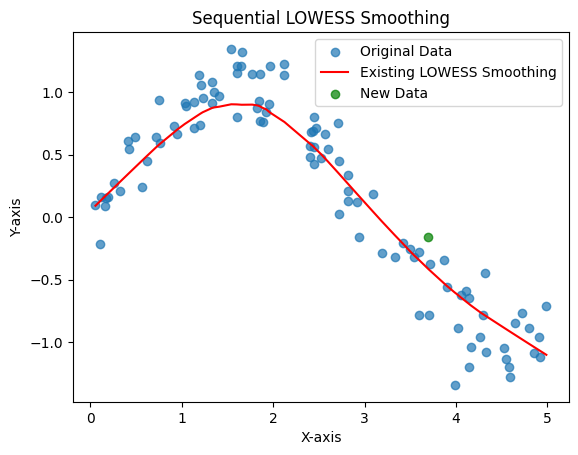

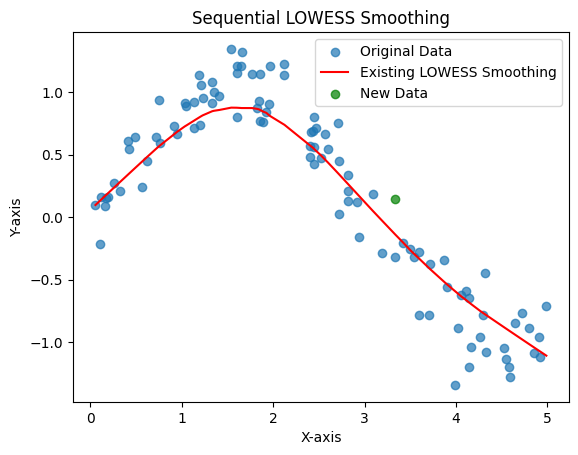

In [40]:
class SequentialLowess:
    def __init__(self, frac=0.3):
        self.lowess = None
        self.frac = frac

    def fit(self, x, y):
        # Perform LOWESS smoothing
        self.lowess = sm.nonparametric.lowess(y, x, frac=self.frac)

    def update(self, x_new, y_new):
        # Update the existing LOWESS smoothed curve with new data
        x_combined = np.concatenate([self.lowess[:, 0], x_new])
        y_combined = np.concatenate([self.lowess[:, 1], y_new])

        self.fit(x_combined, y_combined)

    def plot(self, x, y, x_new=None, y_new=None):
        # Plot the original data, the existing LOWESS curve, and new data points if provided
        plt.scatter(x, y, label='Original Data', alpha=0.7)
        plt.plot(self.lowess[:, 0], self.lowess[:, 1], 'r-', label='Existing LOWESS Smoothing')
        
        if x_new is not None and y_new is not None:
            plt.scatter(x_new, y_new, color='green', label='New Data', alpha=0.7)
        
        plt.legend()
        plt.xlabel('X-axis')
        plt.ylabel('Y-axis')
        plt.title('Sequential LOWESS Smoothing')
        plt.show()

sequential_lowess = SequentialLowess(frac=0.3)

# Generate initial data
x = np.sort(5 * np.random.rand(100))
y = np.sin(x) + 0.2 * np.random.randn(100)

# Fit initial data
sequential_lowess.fit(x, y)

# Plot the initial data and the initial LOWESS smoothed curve
sequential_lowess.plot(x, y)

# Simulate new data arriving sequentially
for i in range(5):
    x_new = np.array([5 * np.random.rand()])
    y_new = np.sin(x_new) + 0.2 * np.random.randn()
    
    # Update and re-fit the LOWESS curve
    sequential_lowess.update(x_new, y_new)
    
    # Plot the updated LOWESS curve with the new data point
    sequential_lowess.plot(x, y, x_new, y_new)

In [295]:
lag = 1; j = 0; k = 1
burn_in = 10

kl_vals = np.array([abs(kl(alpha[i-lag,j,k], alpha[i,j,k],
        beta[i-lag,j,k], beta[i,j,k]))
        for i in np.arange(burn_in,T_max - 1)])

max_values = np.zeros_like(kl_vals)

for i in range(1, len(kl_vals)):
    max_values[i] = np.max(kl_vals[:i])



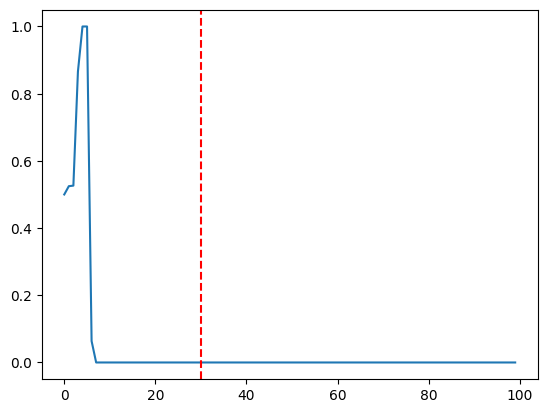

In [12]:
for index in [1]:
    tau_store = tau_list[index]
    plt.plot(np.arange(0, T_max, int_length), tau_store[:,change_node,1])
plt.axvline(x=change_time, color='r', linestyle='--')

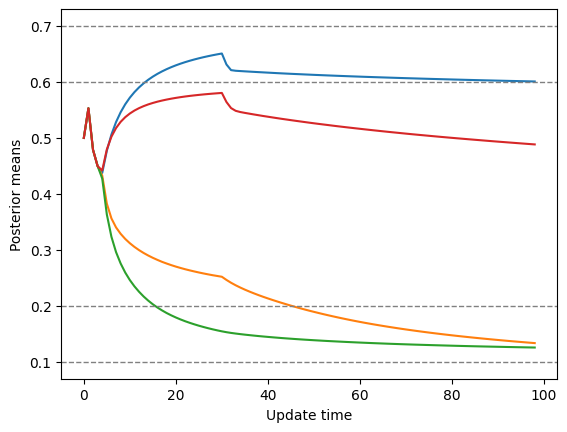

In [29]:
T_max = 100; int_length = 1

# Plot the mean of the posteriors for lambda with iteration number
for index in [3]:
        eta = eta_list[index]; zeta = zeta_list[index]
        for j in range(2):
                for k in range(2):
                        plt.plot(np.arange(int(T_max/int_length) - 1),
                                [eta[i,j,k] / (eta[i,j,k] + zeta[i,j,k]) for i in np.arange(int(T_max/int_length) - 1)])

for i in range(2):
        for j in range(2):
                plt.axhline(rho_matrix[i,j], linestyle='--', linewidth=1, color='gray')

plt.xlabel("Update time")
plt.ylabel(r"Posterior means");

Text(0.5, 0, 'Posterior probability')

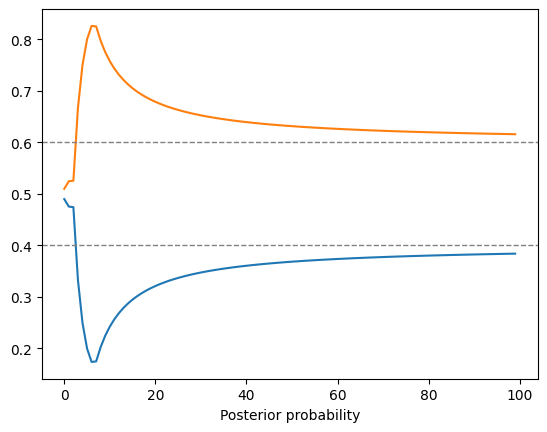

In [136]:
n = n_list[0]
n = n / n.sum(axis=1, keepdims=1)

plt.plot(np.arange(0, T_max, int_length), n)

plt.axhline(0.6, linestyle='--', linewidth=1, color='gray')
plt.axhline(0.4, linestyle='--', linewidth=1, color='gray')
plt.xlabel("Update time"); plt.xlabel("Posterior probability")

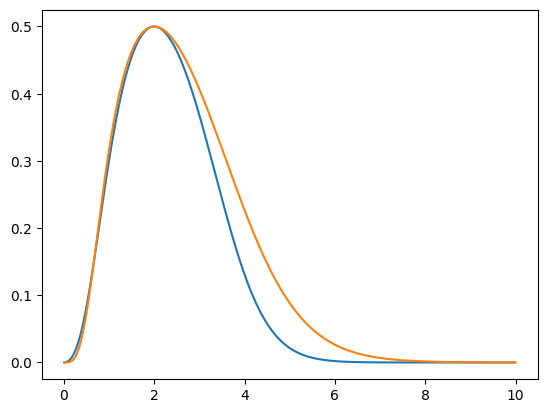

In [17]:
from scipy.special import digamma, gamma

a1 = 2
b1 = 2

kl_div = (lambda x: 
          x[0] * np.log(b1 / x[1]) - np.log(gamma(a1) / gamma(x[0])) + 
          (a1 - x[0]) * digamma(a1) - (b1 - x[1]) * a1 / b1
)

a2 = np.arange(0.01, 10, 0.01)
b2 = np.arange(0.01, 10, 0.01)
y1 = [1 - (np.tanh(kl_div(np.array([x,b1]))) + 1) / 2 for x in a2] 
y2 = [1 - (np.tanh(kl_div(np.array([a1,x]))) + 1) / 2 for x in b2] 
plt.plot(a2,y1)
plt.plot(a2,y2)

In [ ]:
# Define the breakpoints and y-values for each section
lam_matrices = np.array([[[1,2],[3,4]],
                         [[1,2],[3,5]],
                         [[1,0],[3,5]],
                         [[4,0],[3,5]]])

breakpoints = [0, 2, 4, 6]

# Create a figure and axis
fig, ax = plt.subplots()

# Loop through each section and plot a horizontal line
for lam in range(lam_matrices.shape[0]):
    for i in range(len(breakpoints) - 1):
        start_x = breakpoints[i]
        end_x = breakpoints[i + 1]
        y = lam_matrices[lam][i]

        # Plot a horizontal line in the current section
        plt.hlines(y, start_x, end_x, color='blue')

# Set labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Piecewise Plot with Horizontal Lines')

# Show the plot
plt.show()
